# 《哈利·波特》社交网络抽取（Social Network Extraction）

In [1]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib
import jupyterthemes.jtplot as jtplot
jtplot.style()
jtplot.style(theme='onedork') # 选择一个绘图主题 
np.set_printoptions(suppress=True) #取消科学计数法
matplotlib.rcParams['font.sans-serif'] = ['SimHei'] 
matplotlib.rcParams['font.family']='sans-serif'

## 读取数据

In [2]:
data = pd.read_excel('权重.xlsx')
data = data.iloc[:,1:]
data

,人物1,人物2,count
0,哈利,金妮,341
1,哈利,罗恩,2146
2,哈利,小天狼星,567
3,哈利,卢平,274
4,哈利,赫敏,1597
...,...,...,...
4000,卢娜,亚瑟,0
4001,卢娜,莫丽,0
4002,谢诺菲留斯,亚瑟,0
4003,谢诺菲留斯,莫丽,0


In [4]:
G = nx.Graph()
for i in range(len(data)):
    G.add_edge(data.iloc[i, 0], data.iloc[i, 1], weight=data.iloc[i, 2])

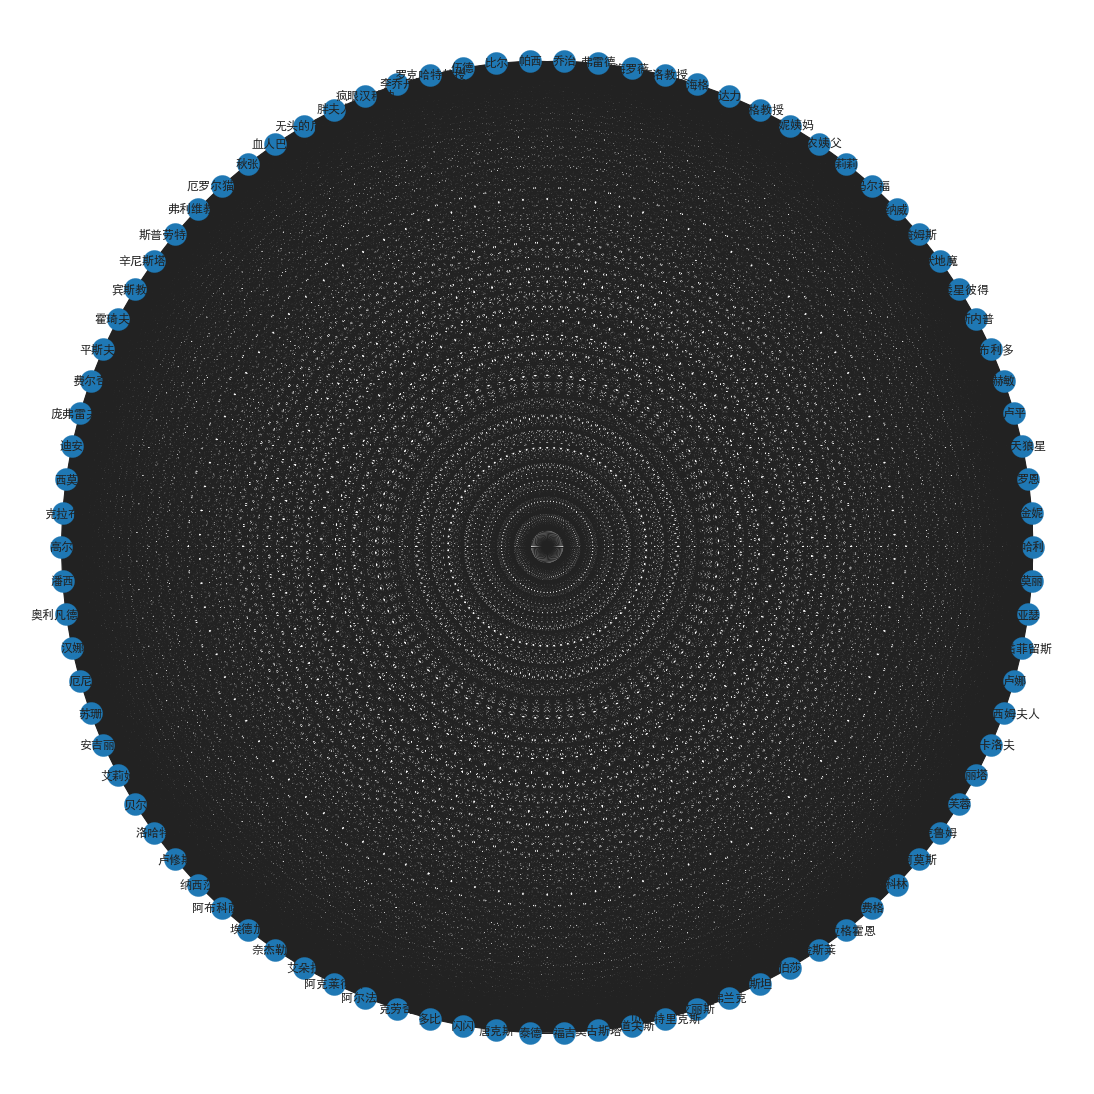

In [6]:
plt.figure(figsize=(15,15))
pos = nx.circular_layout(G)
nx.draw(G,pos,node_size = 500,with_labels=True)
plt.show()

哈利 0 1 []
金妮 1 1 ['哈利']
out of depth
罗恩 1 1 ['哈利']
out of depth
小天狼星 1 1 ['哈利']
out of depth
卢平 1 1 ['哈利']
out of depth
赫敏 1 1 ['哈利']
out of depth
邓布利多 1 1 ['哈利']
out of depth
斯内普 1 1 ['哈利']
out of depth
小矮星彼得 1 1 ['哈利']
out of depth
伏地魔 1 1 ['哈利']
out of depth
詹姆斯 1 1 ['哈利']
out of depth
纳威 1 1 ['哈利']
out of depth
马尔福 1 1 ['哈利']
out of depth
莉莉 1 1 ['哈利']
out of depth
弗农姨父 1 1 ['哈利']
out of depth
佩妮姨妈 1 1 ['哈利']
out of depth
麦格教授 1 1 ['哈利']
out of depth
达力 1 1 ['哈利']
out of depth
海格 1 1 ['哈利']
out of depth
奇洛教授 1 1 ['哈利']
out of depth
海罗薇 1 1 ['哈利']
out of depth
弗雷德 1 1 ['哈利']
out of depth
乔治 1 1 ['哈利']
out of depth
帕西 1 1 ['哈利']
out of depth
比尔 1 1 ['哈利']
out of depth
伍德 1 1 ['哈利']
out of depth
罗克哈特教授 1 1 ['哈利']
out of depth
李乔丹 1 1 ['哈利']
out of depth
疯眼汉穆迪 1 1 ['哈利']
out of depth
胖夫人 1 1 ['哈利']
out of depth
无头的尼克 1 1 ['哈利']
out of depth
血人巴罗 1 1 ['哈利']
out of depth
秋张 1 1 ['哈利']
out of depth
厄罗尔猫头鹰 1 1 ['哈利']
out of depth
弗利维教授 1 1 ['哈利']
out of depth
斯普劳特教授 1 1 ['哈利']
out of depth

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\layout.py:730: RuntimeWarning: divide by zero encountered in true_divide
  costargs = (np, 1 / (dist_mtx + np.eye(dist_mtx.shape[0]) * 1e-3),


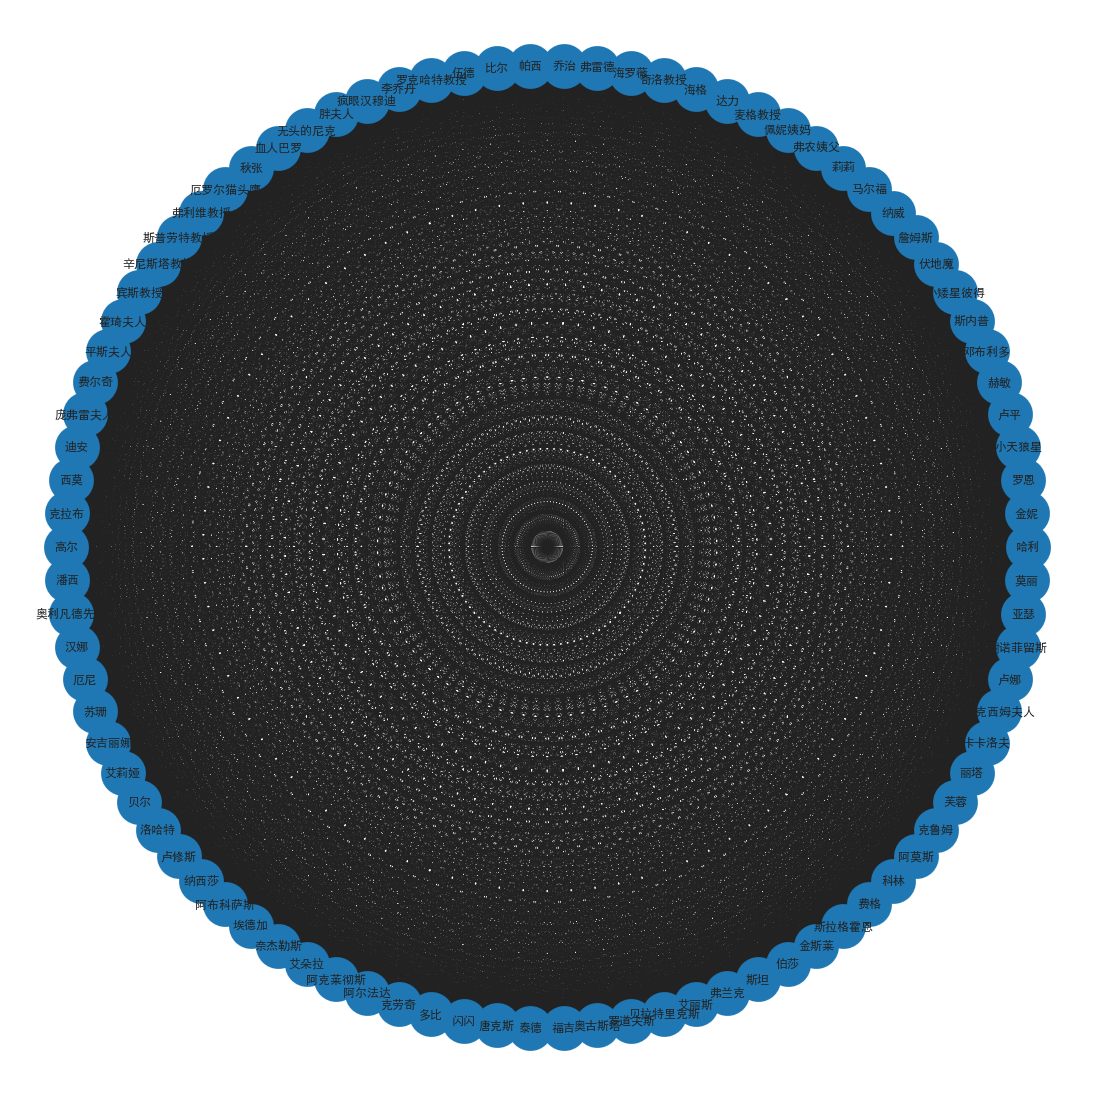

In [76]:
def snowball_sampling(g, center, max_depth=1, current_depth=0, taboo_list=[]):
    print(center, current_depth, max_depth, taboo_list)
    if current_depth == max_depth:
        # 如果我们已经到达搜寻的深度极限，则返回
        print('out of depth')
        return taboo_list
    if center in taboo_list:
        # 如果以前已经访问该节点，则返回
        return taboo_list
    else:
        taboo_list.append(center) # 添加到禁忌表中
        for node in g.neighbors(center):
            # 遍历中心节点的所有好友，递归调用snowball_sampling
            taboo_list = snowball_sampling(g, node, current_depth=current_depth+1, max_depth=max_depth, taboo_list=taboo_list)
        return taboo_list
    
snowball_sampling(G,'哈利')
plt.figure(figsize=(15,15))
nx.draw(G,pos=nx.kamada_kawai_layout(G),node_size=2000,with_labels=True)

# 中心性分析

Text(0.5, 1.0, 'Degree histogram')

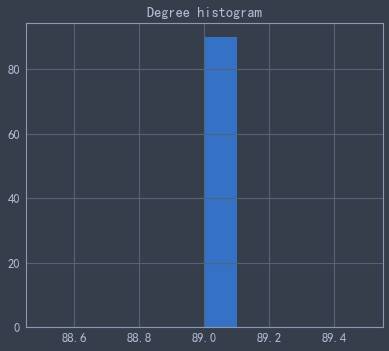

In [80]:
deg=nx.degree(G)
h = plt.hist(dict(deg).values(), bins=10)
plt.title('Degree histogram')

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([89.5, 89.6, 89.7, 89.8, 89.9, 90. , 90.1, 90.2, 90.3, 90.4, 90.5]),
 <a list of 10 Patch objects>)

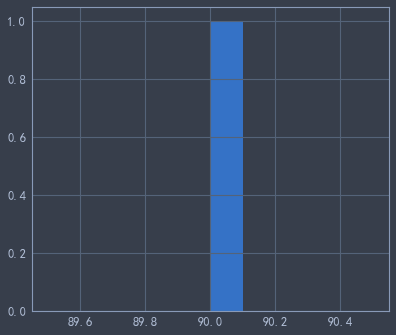

In [81]:
x=[len(c) for c in nx.connected_components(G)]
plt.hist(x)

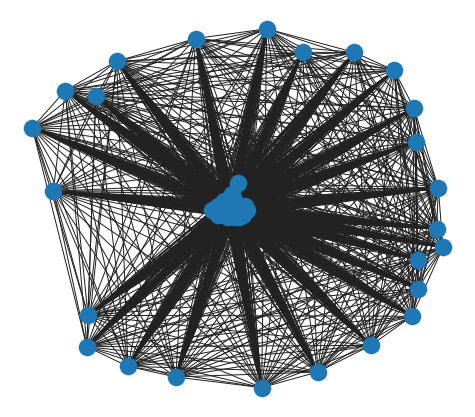

In [82]:
cc = G.subgraph(sorted(list(nx.connected_components(G)), key=lambda x:len(x), reverse=True)[0]) 
nx.draw(cc, with_labels=False)

# 聚类

In [97]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data.iloc[:,0])
data.iloc[:,0] = le.transform(data.iloc[:,0])
le.fit(data.iloc[:,1])
data.iloc[:,1] = le.transform(data.iloc[:,1])
data

,人物1,人物2,count
0,16,77,341
1,16,54,2146
2,16,25,567
3,16,13,274
4,16,72,1597
...,...,...,...
4000,12,2,0
4001,12,63,0
4002,67,2,0
4003,67,63,0


集群数目为: 29


IndexingError: Too many indexers

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


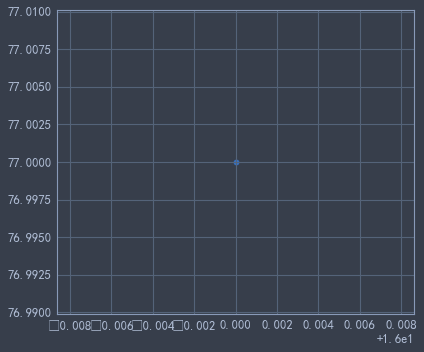

In [111]:
from sklearn.cluster import MeanShift,estimate_bandwidth
from itertools import cycle
import sklearn.metrics as ms

bandwidth = estimate_bandwidth(data.values,quantile=0.1,n_samples=len(data))
meanshift_cluster = MeanShift(bandwidth=bandwidth,bin_seeding=True)
meanshift_cluster.fit(data.values)
labels = meanshift_cluster.labels_
centeroids = meanshift_cluster.cluster_centers_
centeroids = pd.DataFrame(centeroids)
num_clusters = len(np.unique(labels))
print('集群数目为:',num_clusters)

# 集群可视化:画出数据点和集群中心
plt.figure()
# 迭代群标记
for i in range(len(data)):
    # 画出集群数据点
    plt.scatter(data.iloc[i,0],data.iloc[i,1])
    # 画出集群中心
    centeroid = centeroids[i]
    plt.plot(centeroid.iloc[i,0],centeroid.iloc[i,1],markersize=15)
    
plt.title('HarryPotter Groups of Characters')
plt.show()
meanshift_score = ms.silhouette_score(data,meanshift_cluster.labels_,metric='euclidean',sample_size=len(data))
print(meanshift_score)